# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [5]:
cities_pd = pd.DataFrame(cities)
cities_pd.head()

,0
0,petropavlovsk-kamchatskiy
1,barrow
2,sao filipe
3,sawankhalok
4,mitchell


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
# Set up query url with API key
url = "http://api.openweathermap.org/data/2.5/forecast?"
units = "Imperial"

query_url = f'{url}appid={api_key}&units={units}'


# Create list to append data later
weather_data = []

In [48]:
#API Call
for city in cities:
    
    try:

        response = requests.get(f"{query_url}&q={city}").json()
        
        city_name = response['city']['name']
        country_name = response['city']['country']
        lat = response['city']['coord']['lat']
        lng = response['city']['coord']['lon']
        max_temp = response['list'][0]['main']['temp_max']
        humidity = response['list'][0]['main']['humidity']
        wind = response['list'][0]['wind']['speed']
        clouds = response['list'][0]['clouds']['all']
        
        weather_data.append({
            "City": city_name,
            "Country": country_name,
            "Lat": lat,
            "Lng": lng,
            "Cloudiness": clouds,
            "Humidity": humidity,
            "Max Temp": max_temp,
            "Wind Speed": wind})
        
        print(f'Processing Record {records} | {city_name}')
        
        records = records + 1
        
        #Prevents API getting blocked
        time.sleep(1.01)
                
    except:
        print("City Skipped")
    continue
    
print('-----------------------------')
print('Records processed')
print('-----------------------------')

City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped
City Skipped

In [26]:
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Petropavlovsk-Kamchatskiy,100,RU,94,53.0452,158.6483,18.82,9.04
1,Barrow,0,AR,42,-38.3131,-60.2291,80.38,11.68
2,Sawankhalok,20,TH,72,17.3114,99.8283,74.70,3.87
3,Mitchell,75,US,93,43.7095,-98.0254,30.87,6.11
4,Lagoa,100,PT,78,37.1363,-8.4541,59.36,8.79


In [27]:
weather_df.count()


City          445
Cloudiness    445
Country       445
Humidity      445
Lat           445
Lng           445
Max Temp      445
Wind Speed    445
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
#Save Dataframe into a CSV 

weather_df.to_csv("output_data_file")
print("Successfully saved to csv!")

Successfully saved to csv!


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

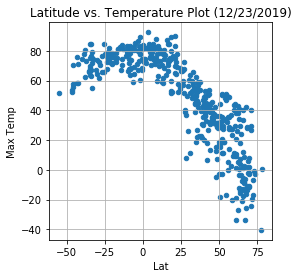

In [35]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(4,4),
              title="Latitude vs. Temperature Plot (12/23/2019)")
plt.savefig("../Lat_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

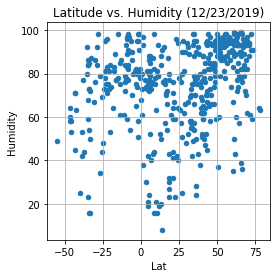

In [36]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(4,4),
              title="Latitude vs. Humidity (12/23/2019)")
plt.savefig("../Lat_Humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

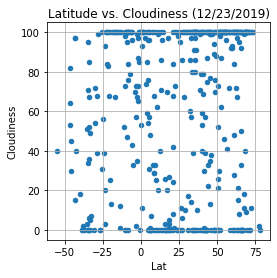

In [37]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(4,4),
              title="Latitude vs. Cloudiness (12/23/2019)")
plt.savefig("../Lat_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

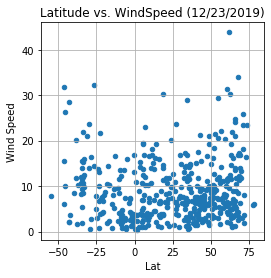

In [38]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(4,4),
              title="Latitude vs. WindSpeed (12/23/2019)")
plt.savefig("../Lat_Wind.png")
plt.show()